# Importing Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Displaying signatures

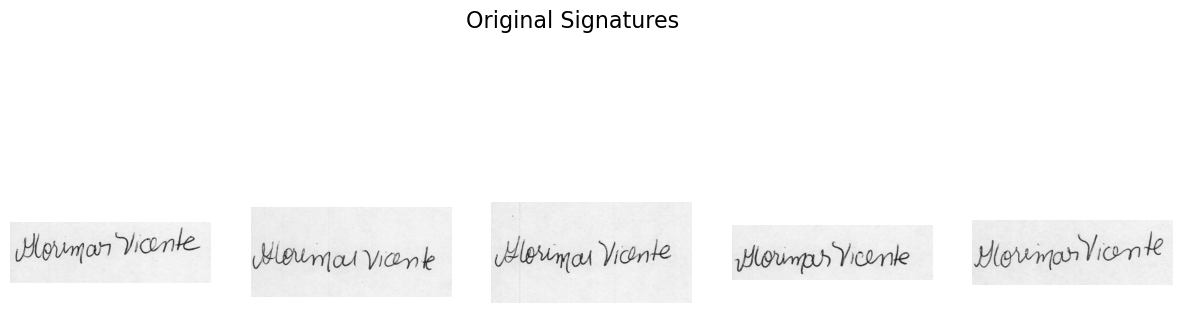

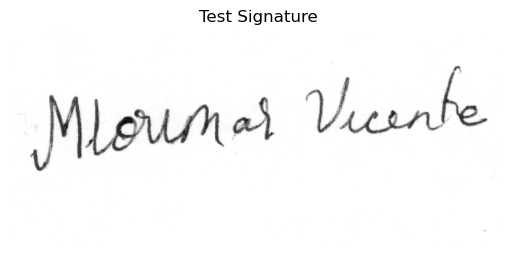

In [2]:
# Path to your dataset
original_signatures_path = "C:/data/dsatm/5th sem/Mini Project/dataset/cedar dataset/trial/original"  # Update this to your folder path
test_signature_path = "C:/data/dsatm/5th sem/Mini Project/dataset/cedar dataset/trial/fake/forgeries_2_1.png"  # Update this to your test image file path

# Helper function to load images
def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename), cv2.IMREAD_GRAYSCALE)  # Fix applied here
        if img is not None:
            images.append(img)
    return images

# Load original and test signatures
original_signatures = load_images_from_folder(original_signatures_path)
test_signature = cv2.imread(test_signature_path, cv2.IMREAD_GRAYSCALE)

# Display some original signatures
def display_images(images, title="Original Signatures", rows=1, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5))
    for i in range(min(len(images), rows * cols)):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].axis('off')
    fig.suptitle(title, fontsize=16)
    plt.show()

# Show samples
display_images(original_signatures, title="Original Signatures")
plt.imshow(test_signature, cmap='gray')
plt.title("Test Signature")
plt.axis("off")
plt.show()


# Pre-processing 

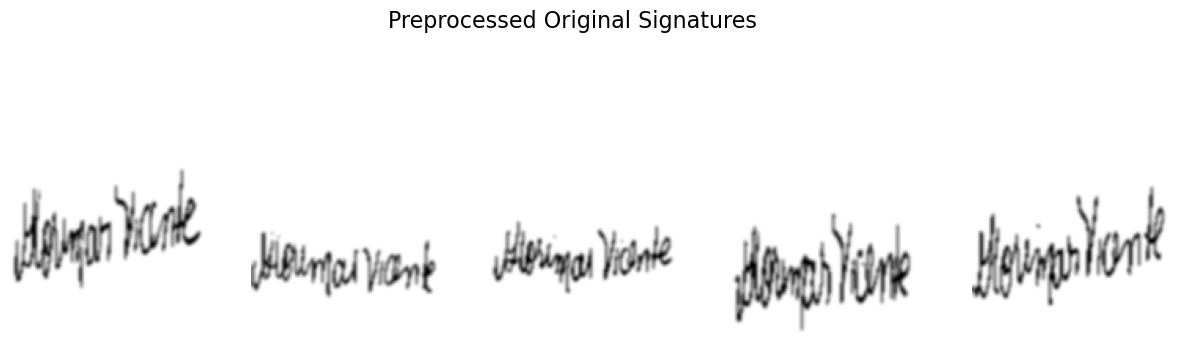

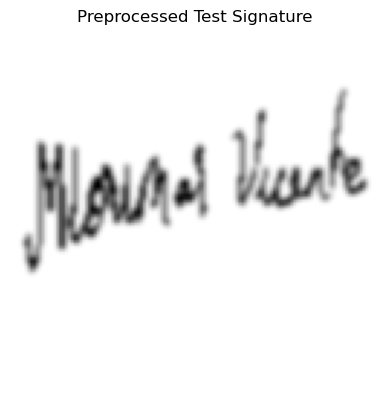

In [3]:
def preprocess_signature(image, resize_dim=(128, 128)):
    # Convert to grayscale (if not already)
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Resize the image
    image = cv2.resize(image, resize_dim, interpolation=cv2.INTER_AREA)
    
    # Binarize the image using Otsu's thresholding
    _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Apply noise reduction (Gaussian blur)
    denoised_image = cv2.GaussianBlur(binary_image, (5, 5), 0)
    
    # Extract the signature region using contours
    contours, _ = cv2.findContours(denoised_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        # Get bounding box of the largest contour
        x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))
        cropped_image = denoised_image[y:y+h, x:x+w]
        
        # Resize cropped region back to target dimensions
        cropped_image = cv2.resize(cropped_image, resize_dim, interpolation=cv2.INTER_AREA)
    else:
        # If no contours found, use the whole image
        cropped_image = denoised_image
    
    return cropped_image

# Apply preprocessing to all original signatures
preprocessed_signatures = [preprocess_signature(img) for img in original_signatures]

# Preprocess the test signature
preprocessed_test_signature = preprocess_signature(test_signature)

# Display preprocessed images
display_images(preprocessed_signatures, title="Preprocessed Original Signatures")
plt.imshow(preprocessed_test_signature, cmap='gray')
plt.title("Preprocessed Test Signature")
plt.axis("off")
plt.show()

# Segmentation

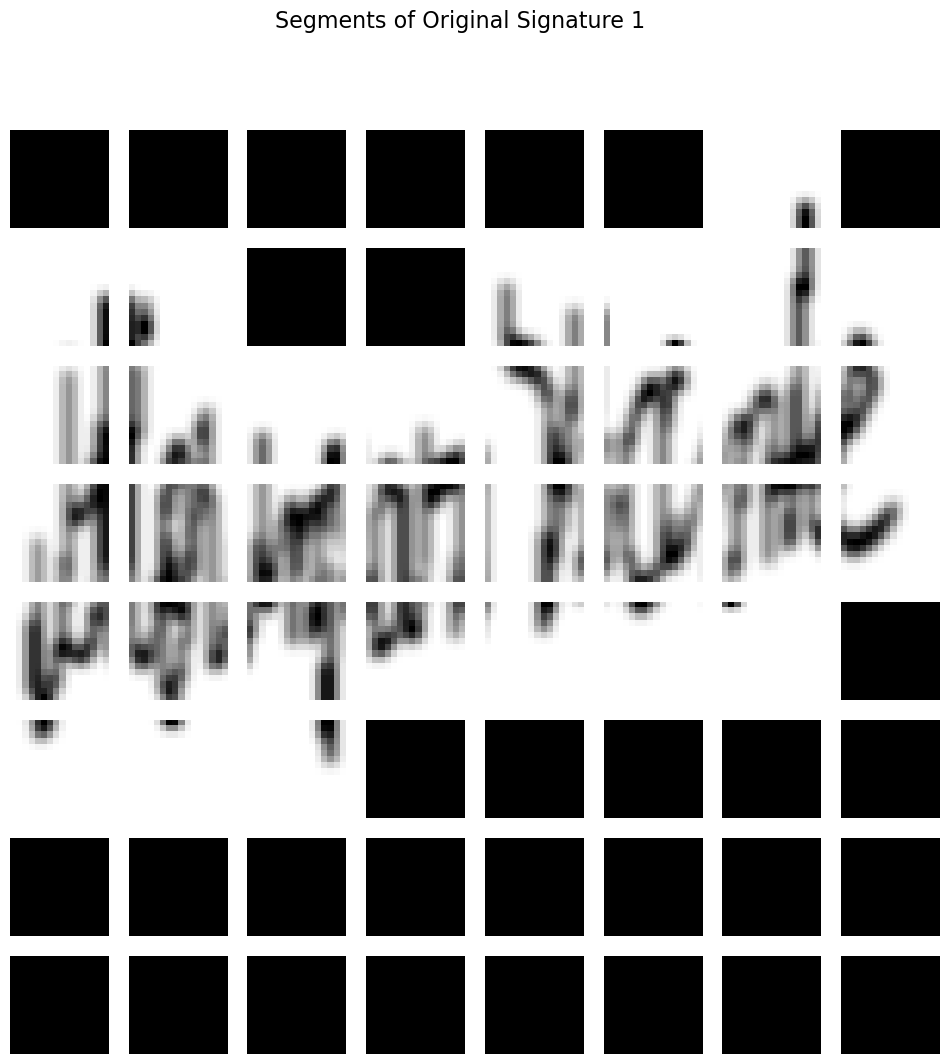

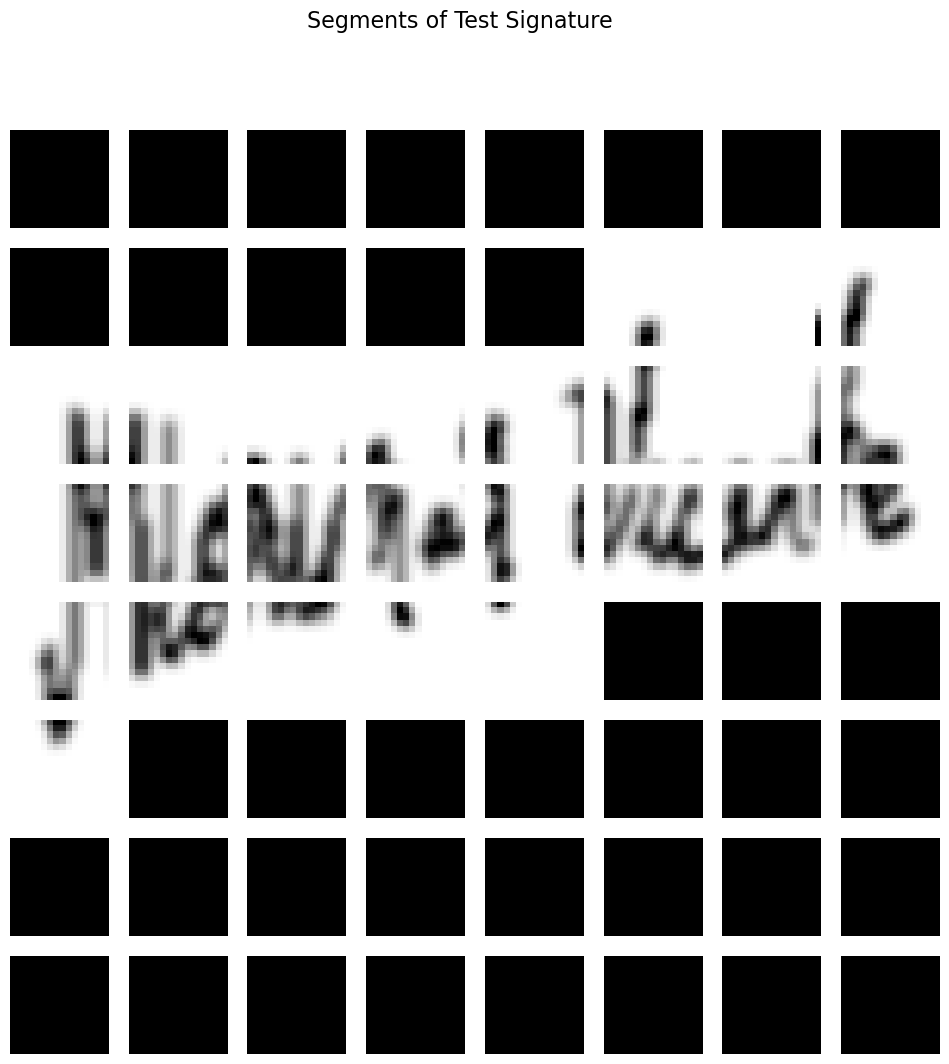

In [4]:
grid_size=(8, 8)
def segment_image(image, grid_size=grid_size):
    """
    Segment the image into a 8X8 grid for more detailed comparison.
    
    Args:
        image (numpy array): Preprocessed image.
        grid_size (tuple): Number of rows and columns for the grid (64x64).
    
    Returns:
        List of segments.
    """
    h, w = image.shape
    rows, cols = grid_size
    segment_height = h // rows
    segment_width = w // cols
    
    segments = []
    for r in range(rows):
        for c in range(cols):
            segment = image[r * segment_height:(r + 1) * segment_height, c * segment_width:(c + 1) * segment_width]
            segments.append(segment)
    return segments

# Segment all preprocessed original signatures with 64x64 grid
segmented_signatures = [segment_image(img, grid_size=grid_size) for img in preprocessed_signatures]

# Segment the preprocessed test signature with 64x64 grid
segmented_test_signature = segment_image(preprocessed_test_signature, grid_size=grid_size)

# Display segments from the first preprocessed original signature
def display_segments(segments, grid_size=grid_size, title="Segments"):
    rows, cols = grid_size
    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    for i, ax in enumerate(axes.flat):
        ax.imshow(segments[i], cmap='gray')
        ax.axis('off')
    fig.suptitle(title, fontsize=16)
    plt.show()

# Show segments for the first original signature and the test signature
display_segments(segmented_signatures[0], grid_size=grid_size, title="Segments of Original Signature 1")
display_segments(segmented_test_signature, grid_size=grid_size, title="Segments of Test Signature")


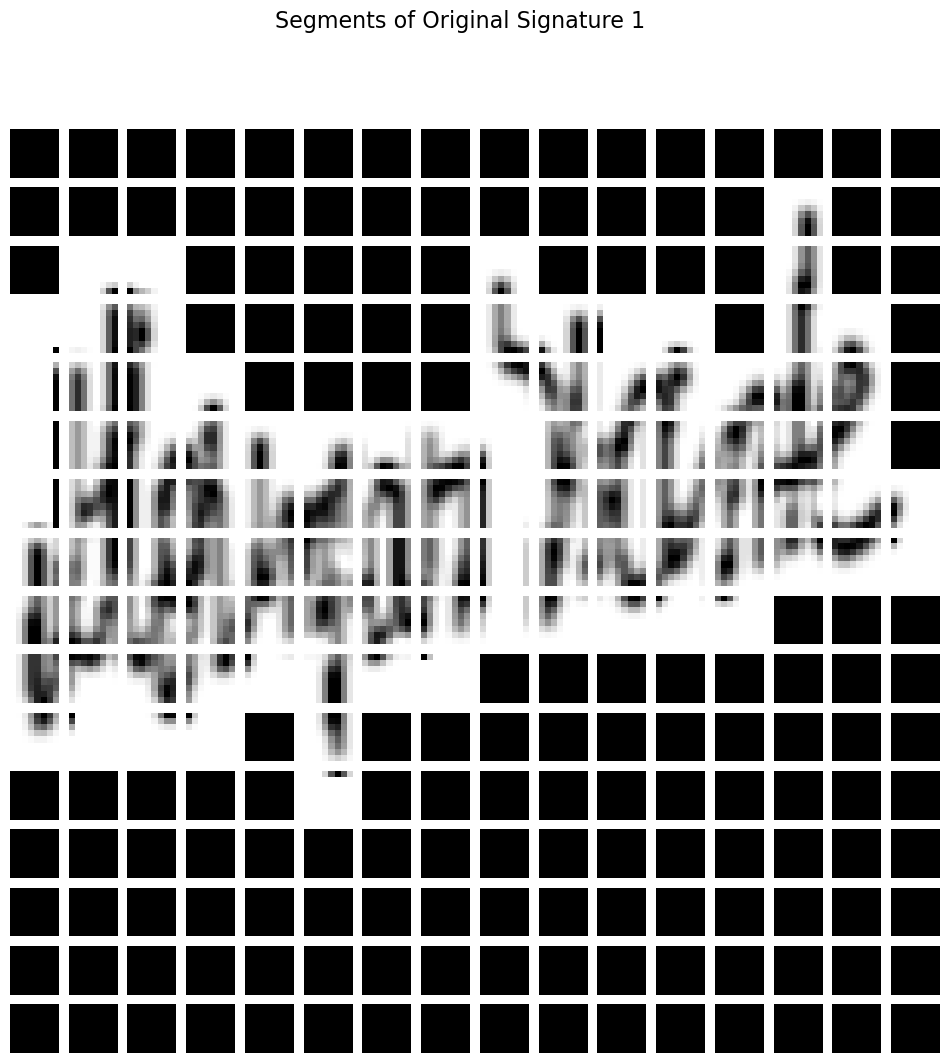

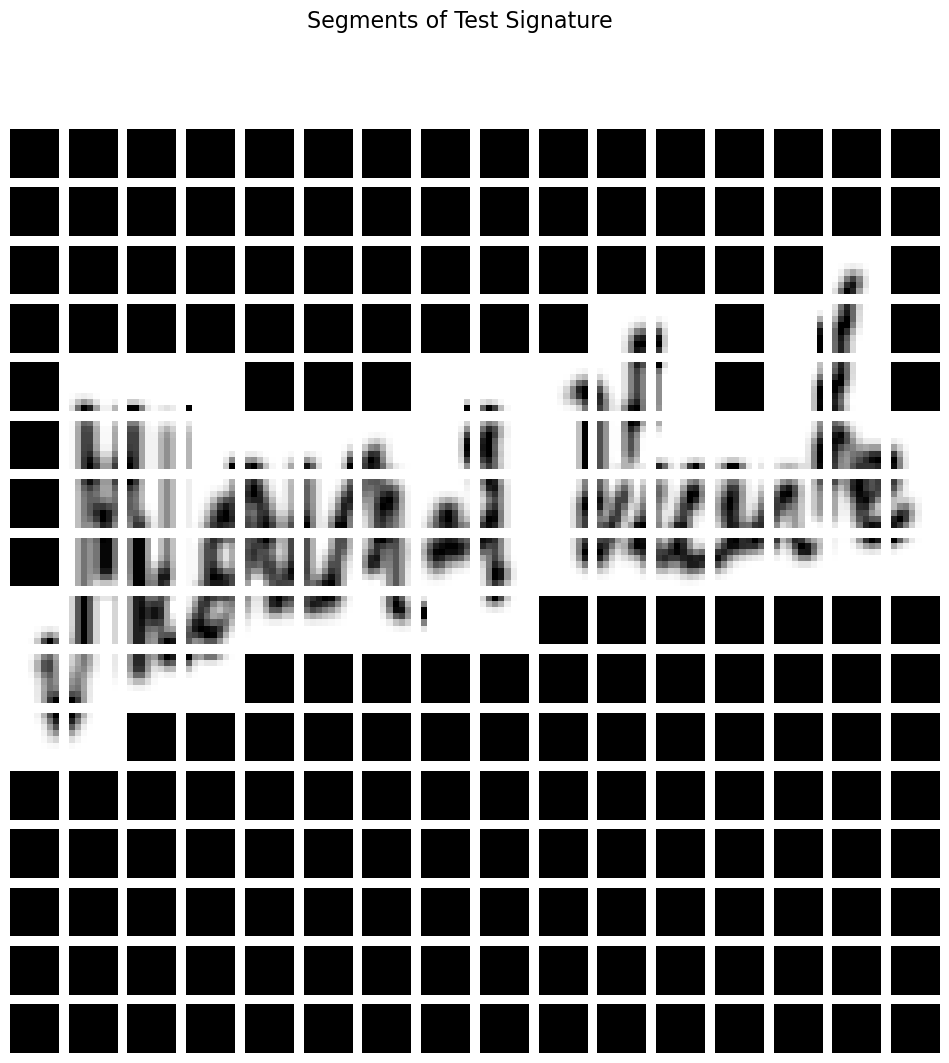

In [5]:
grid_size=(16, 16)
def segment_image(image, grid_size=grid_size):
    """
    Segment the image into a 8X8 grid for more detailed comparison.
    
    Args:
        image (numpy array): Preprocessed image.
        grid_size (tuple): Number of rows and columns for the grid (64x64).
    
    Returns:
        List of segments.
    """
    h, w = image.shape
    rows, cols = grid_size
    segment_height = h // rows
    segment_width = w // cols
    
    segments = []
    for r in range(rows):
        for c in range(cols):
            segment = image[r * segment_height:(r + 1) * segment_height, c * segment_width:(c + 1) * segment_width]
            segments.append(segment)
    return segments

# Segment all preprocessed original signatures with 64x64 grid
segmented_signatures = [segment_image(img, grid_size=grid_size) for img in preprocessed_signatures]

# Segment the preprocessed test signature with 64x64 grid
segmented_test_signature = segment_image(preprocessed_test_signature, grid_size=grid_size)

# Display segments from the first preprocessed original signature
def display_segments(segments, grid_size=grid_size, title="Segments"):
    rows, cols = grid_size
    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    for i, ax in enumerate(axes.flat):
        ax.imshow(segments[i], cmap='gray')
        ax.axis('off')
    fig.suptitle(title, fontsize=16)
    plt.show()

# Show segments for the first original signature and the test signature
display_segments(segmented_signatures[0], grid_size=grid_size, title="Segments of Original Signature 1")
display_segments(segmented_test_signature, grid_size=grid_size, title="Segments of Test Signature")


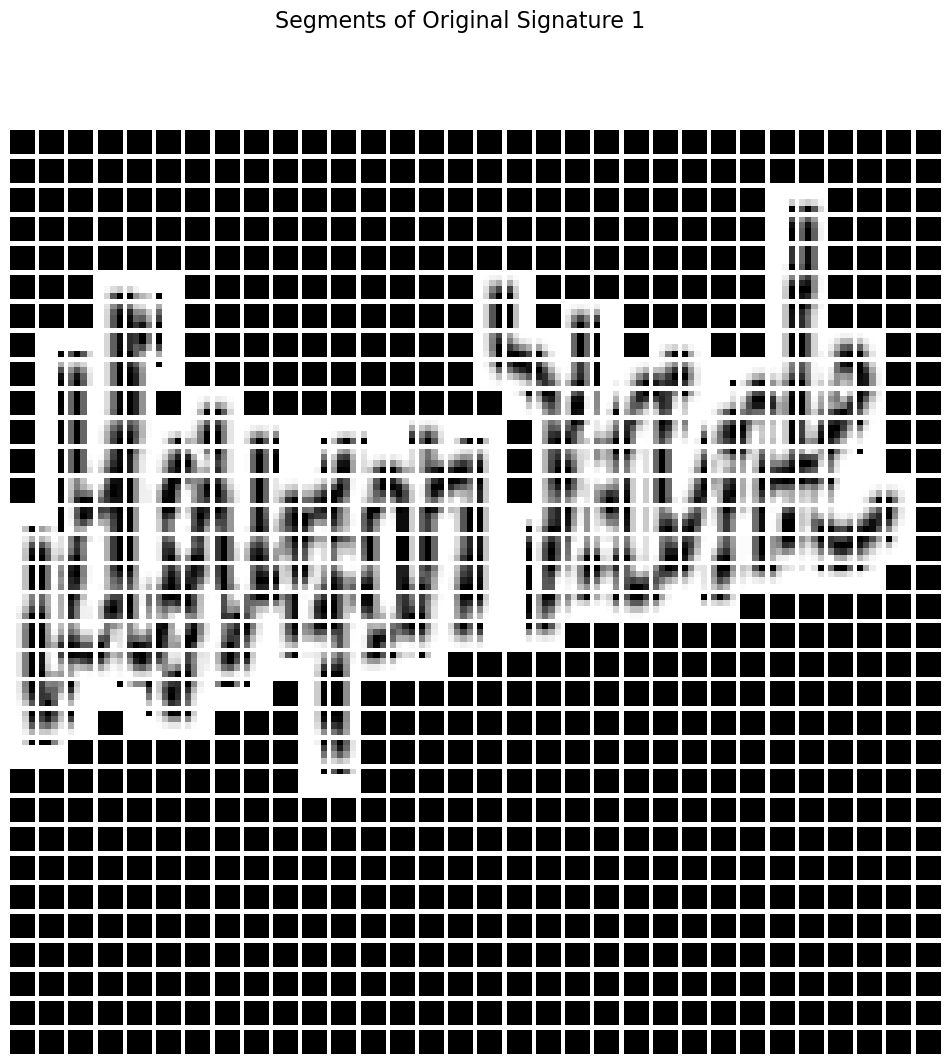

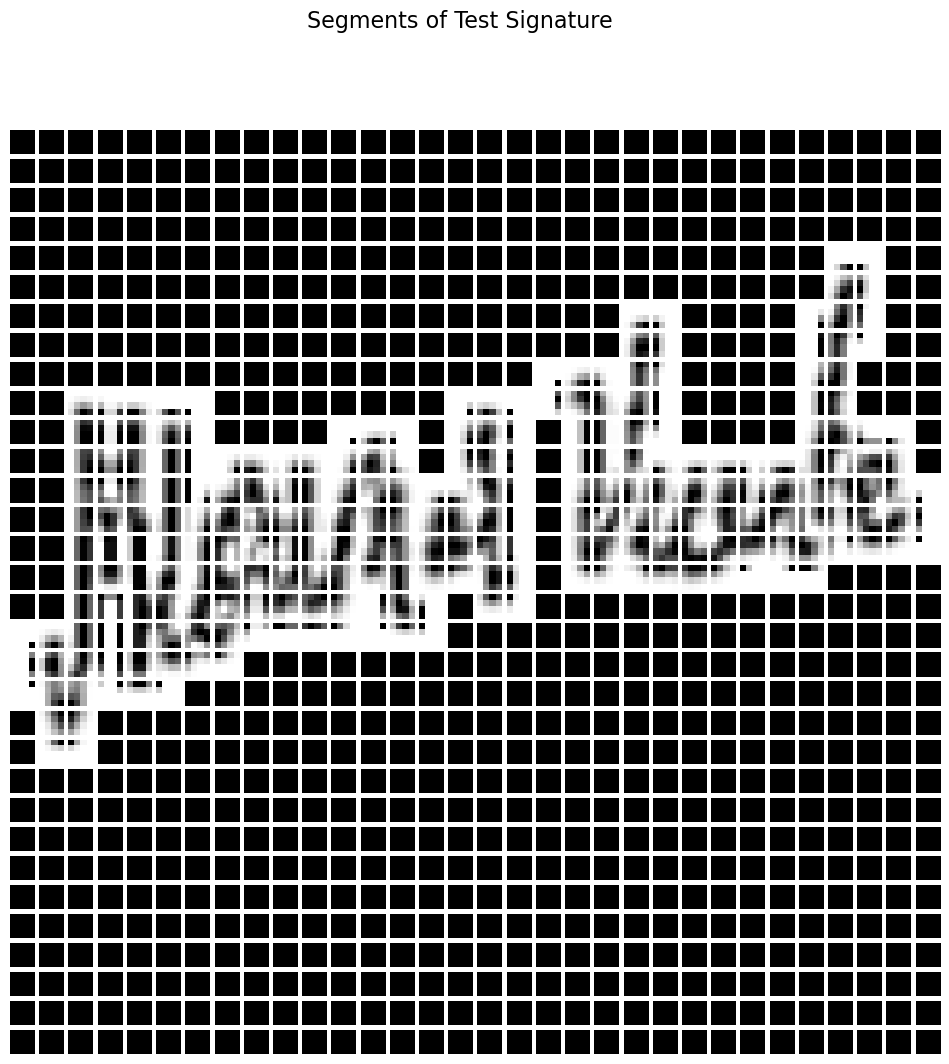

In [6]:
grid_size=(32, 32)
def segment_image(image, grid_size=grid_size):
    """
    Segment the image into a 8X8 grid for more detailed comparison.
    
    Args:
        image (numpy array): Preprocessed image.
        grid_size (tuple): Number of rows and columns for the grid (64x64).
    
    Returns:
        List of segments.
    """
    h, w = image.shape
    rows, cols = grid_size
    segment_height = h // rows
    segment_width = w // cols
    
    segments = []
    for r in range(rows):
        for c in range(cols):
            segment = image[r * segment_height:(r + 1) * segment_height, c * segment_width:(c + 1) * segment_width]
            segments.append(segment)
    return segments

# Segment all preprocessed original signatures with 64x64 grid
segmented_signatures = [segment_image(img, grid_size=grid_size) for img in preprocessed_signatures]

# Segment the preprocessed test signature with 64x64 grid
segmented_test_signature = segment_image(preprocessed_test_signature, grid_size=grid_size)

# Display segments from the first preprocessed original signature
def display_segments(segments, grid_size=grid_size, title="Segments"):
    rows, cols = grid_size
    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    for i, ax in enumerate(axes.flat):
        ax.imshow(segments[i], cmap='gray')
        ax.axis('off')
    fig.suptitle(title, fontsize=16)
    plt.show()

# Show segments for the first original signature and the test signature
display_segments(segmented_signatures[0], grid_size=grid_size, title="Segments of Original Signature 1")
display_segments(segmented_test_signature, grid_size=grid_size, title="Segments of Test Signature")


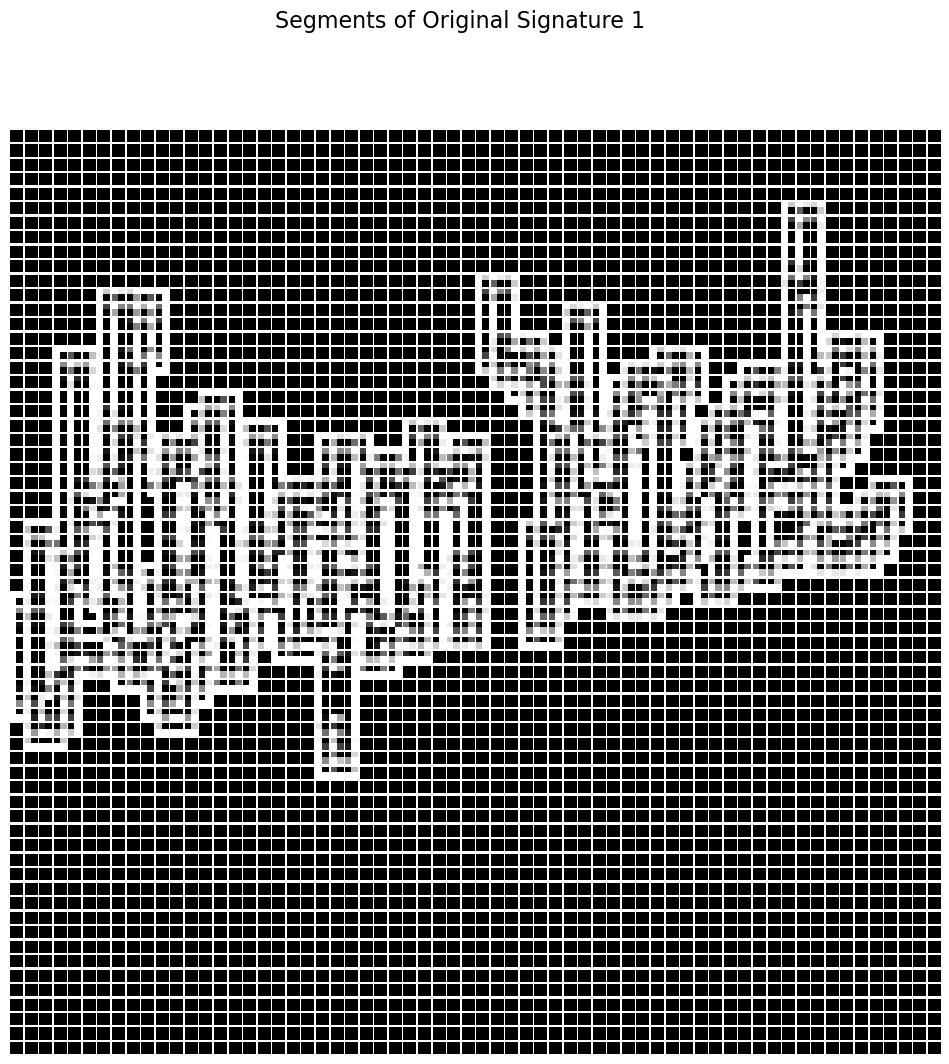

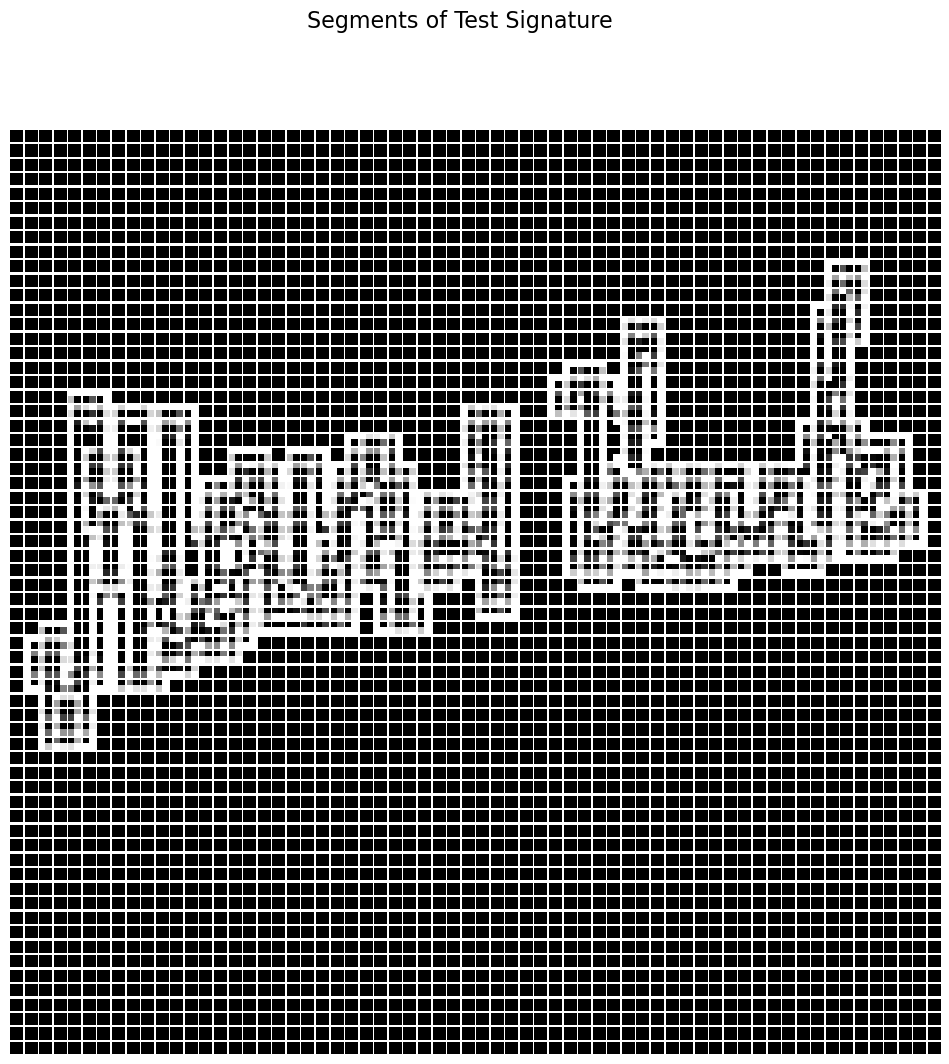

In [7]:
grid_size=(64, 64)
def segment_image(image, grid_size=grid_size):
    """
    Segment the image into a 8X8 grid for more detailed comparison.
    
    Args:
        image (numpy array): Preprocessed image.
        grid_size (tuple): Number of rows and columns for the grid (64x64).
    
    Returns:
        List of segments.
    """
    h, w = image.shape
    rows, cols = grid_size
    segment_height = h // rows
    segment_width = w // cols
    
    segments = []
    for r in range(rows):
        for c in range(cols):
            segment = image[r * segment_height:(r + 1) * segment_height, c * segment_width:(c + 1) * segment_width]
            segments.append(segment)
    return segments

# Segment all preprocessed original signatures with 64x64 grid
segmented_signatures = [segment_image(img, grid_size=grid_size) for img in preprocessed_signatures]

# Segment the preprocessed test signature with 64x64 grid
segmented_test_signature = segment_image(preprocessed_test_signature, grid_size=grid_size)

# Display segments from the first preprocessed original signature
def display_segments(segments, grid_size=grid_size, title="Segments"):
    rows, cols = grid_size
    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    for i, ax in enumerate(axes.flat):
        ax.imshow(segments[i], cmap='gray')
        ax.axis('off')
    fig.suptitle(title, fontsize=16)
    plt.show()

# Show segments for the first original signature and the test signature
display_segments(segmented_signatures[0], grid_size=grid_size, title="Segments of Original Signature 1")
display_segments(segmented_test_signature, grid_size=grid_size, title="Segments of Test Signature")


# Comparison